# Mod 5 Online Project  

# Introduction

## Intro

I have been tasked with finding a dataset to run some Clustering algorithms on.

The one I have found contains the spending habits of ~9000 credit card users, and we will do some Market segmentation to help us define specific marketing strategy for individual groups. 

For each user, we have 18 spending habits (our data points).

## Column Names

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

## Import the important libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture 
from sklearn import metrics
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings(action="ignore")

## First look at the dataset

In [36]:
df = pd.read_csv('credit.csv')

In [37]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Lets separate off the Customer ID's as they won't be of any use in clustering

In [38]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [39]:
ids = df.CUST_ID
df.drop(['CUST_ID'],axis=1,inplace=True)

In [40]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [41]:
df.fillna(df.mean(),inplace=True) #fill the few null values with the means of the column

In [42]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [43]:
scaler = StandardScaler() ##create scaler object
scaled_df = scaler.fit_transform(df) ##use scaler object to scale our data
normalized_df = normalize(scaled_df)  ##normalise our data (returns a numpy array)
normalized_df = pd.DataFrame(normalized_df)  ## turn our normalised numpy array back into a dataframeb

In [44]:
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-2.250182e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400


## Running some clustering

With our scaled normalized dataset, we are going to run a two different kinds of Clustering, and then evaluate which has done the best job. 

1 - K Means Clustering

2 - Hierarchical Agglomerative Clustering

### K Means Clustering

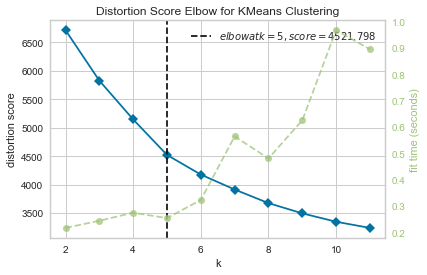

In [11]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12)) 
visualizer.fit(normalized_df)        # Fit the data to the visualizer
visualizer.show() 

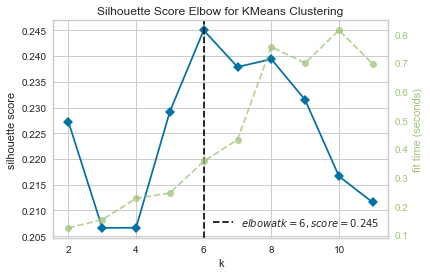

In [12]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette')

visualizer.fit(normalized_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

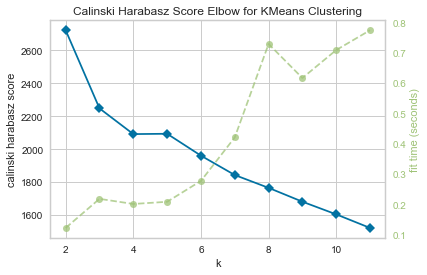

In [13]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12),metric='calinski_harabasz')
visualizer.fit(normalized_df) 
visualizer.show() 

In [14]:
pca = PCA(n_components=10)
pca_df = pca.fit_transform(normalized_df)
np.cumsum(pca.explained_variance_ratio_)[-1]

0.9450988000495766

In [15]:
pca_df = pd.DataFrame(pca_df) 
pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.489826,-0.679678,-0.097458,0.116886,-0.003757,-0.049281,-0.108931,0.082104,0.061556,0.011479
1,-0.518791,0.545011,0.196412,-0.202644,-0.265264,0.195829,0.030025,0.085895,-0.029541,0.459587
2,0.330885,0.268978,0.115880,0.746183,0.130809,-0.098707,0.053016,-0.365378,-0.231407,0.071002
3,-0.482374,-0.092111,0.453704,0.288995,-0.397096,-0.260659,-0.041193,-0.038693,0.064932,-0.254930
4,-0.563289,-0.481915,-0.256500,0.323868,0.028085,0.085078,0.045171,0.135501,0.023906,0.057353


So, we have lost 5.5% of the explained varience, for the trade off of having fewer parameters to work with. Let's see if it clusters even better 

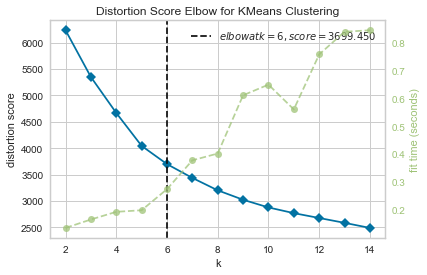

In [16]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(pca_df)        # Fit the data to the visualizer
visualizer.show()    

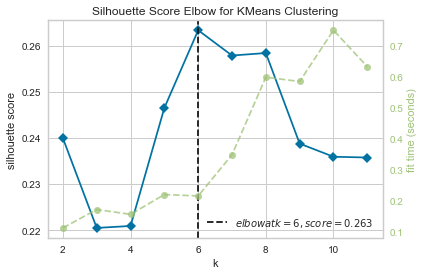

In [17]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette')
visualizer.fit(pca_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

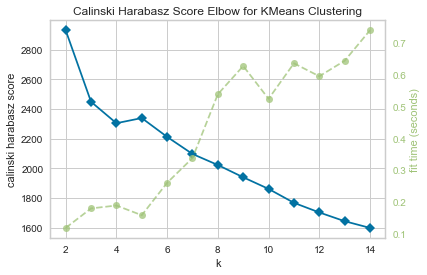

In [18]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15),metric='calinski_harabasz')

visualizer.fit(pca_df) 
visualizer.show() 

So it's looking like 5/6 clusters is going to be a good place to start according to K Means

### Hierarchical Agglomerative Clustering

Let's run HAC and compare the results with K Means looking at CH Score and Silhouette Score. 

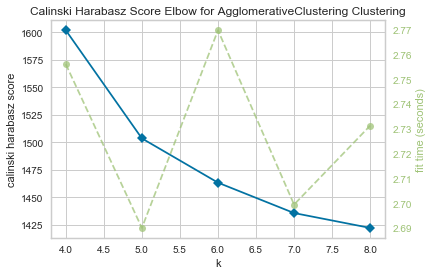

In [19]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(4,9), metric='calinski_harabasz')
visualizer.fit(pca_df)
visualizer.show()  

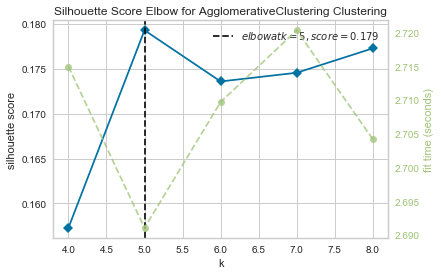

In [20]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(4,9), metric='silhouette')
visualizer.fit(pca_df)
visualizer.show()  

With a Silhouetter score at the elbow of 0.179, vs that of K Means at 0.263, we can see that K Means seems to be doing a better job right now! Lets run it on the scaled, normalized df just to be sure.

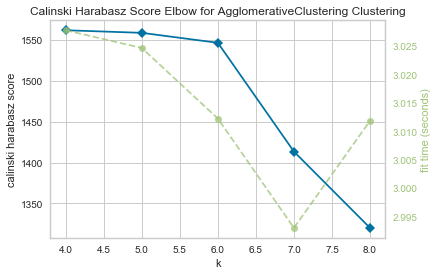

In [21]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(4,9), metric='calinski_harabasz')
visualizer.fit(normalized_df)
visualizer.show()

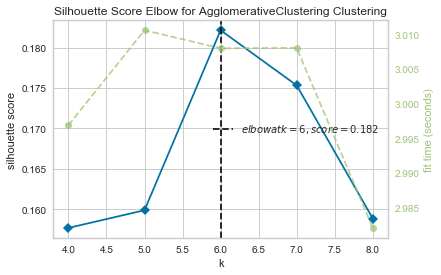

In [22]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(4,9), metric='silhouette')
visualizer.fit(normalized_df)
visualizer.show()  

For now, we are going to use the KMeans algorithm with 6 clusters, as it is achieving the best scores!

## Improving and exploring the clusters

1 - We tweak the KMeans algorithm, particularly to mitigate error caused by poor initialisation points

2 - We use histograms and Random Forest feature importance to explore what makes each cluster unique 

### Improvements

KMeans has a few parameters that we can tweak under the hood to improve performance.

1 - it is already using k means ++, a better version of picking initial points than just randomly

2 - n_init can be increased, which will rerun the algorithm more times, mitigating error caused by poor 
initialisation points

3 - max_iter - let the algorithm run for longer to try get more accurate clustering

4 - tol - stop the algorithm only at a higher level of convergence 

This will mean longer run time but that is no problem

In [45]:
kmean= KMeans(n_clusters=6, init='k-means++', n_init=100, max_iter=500, tol=0.00001)
kmean.fit(normalized_df)
labels=kmean.labels_

In [46]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


### Exploration

In [ ]:
Now we have our well defined and labelled clusters, lets have a closer look at them. 

In [25]:
print(clusters.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

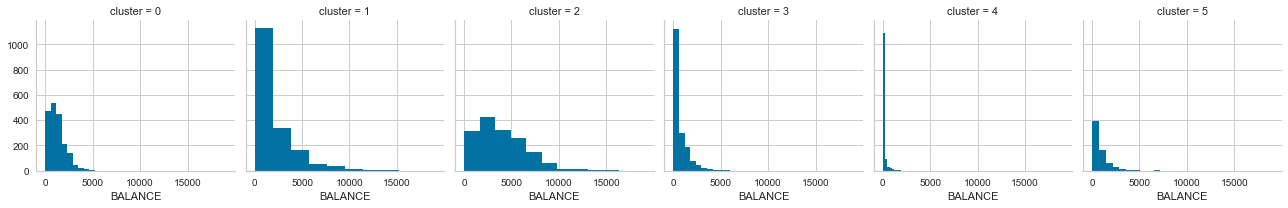

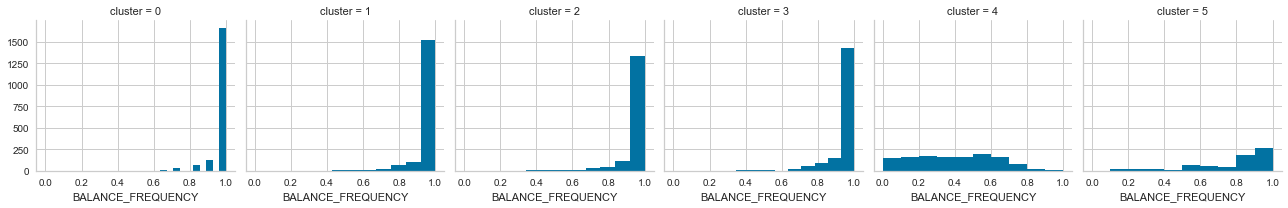

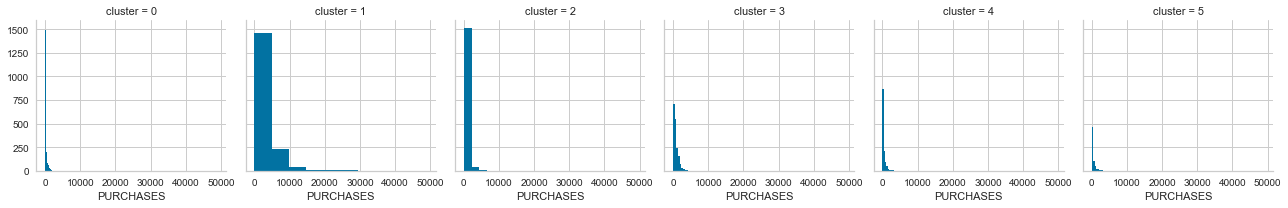

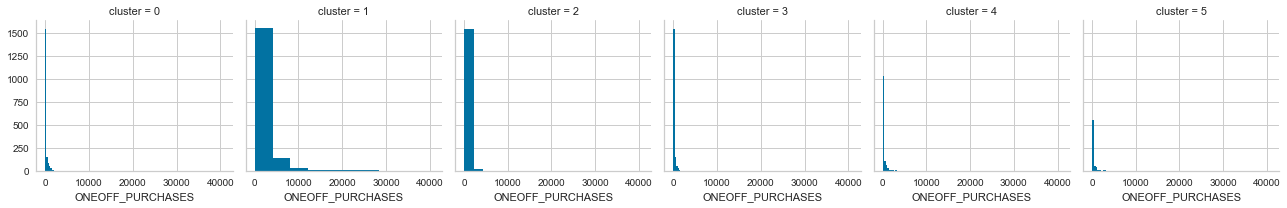

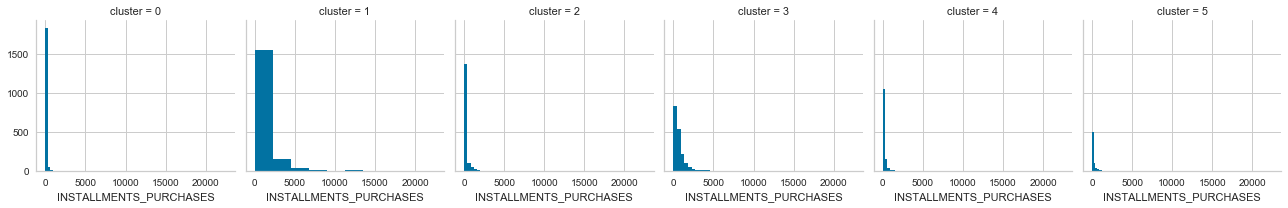

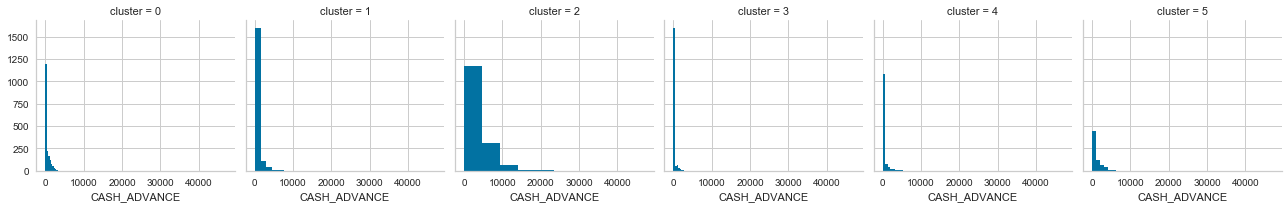

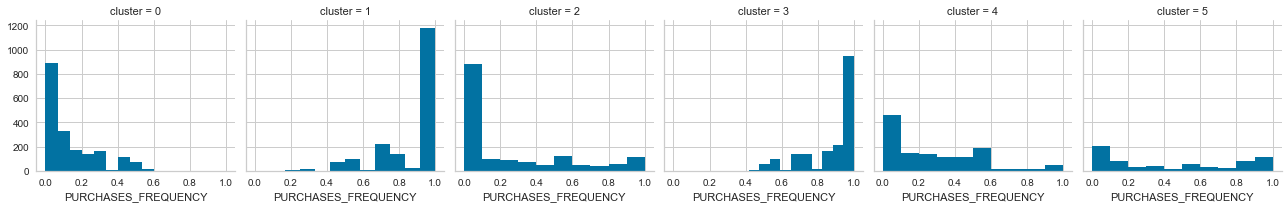

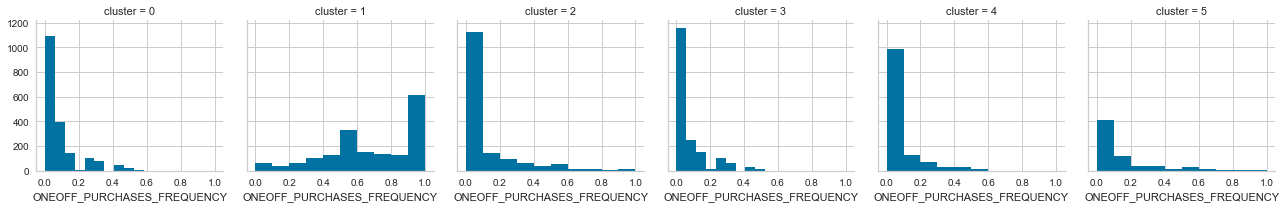

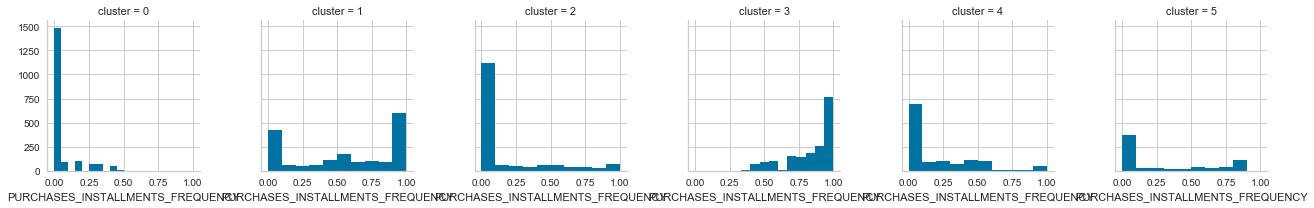

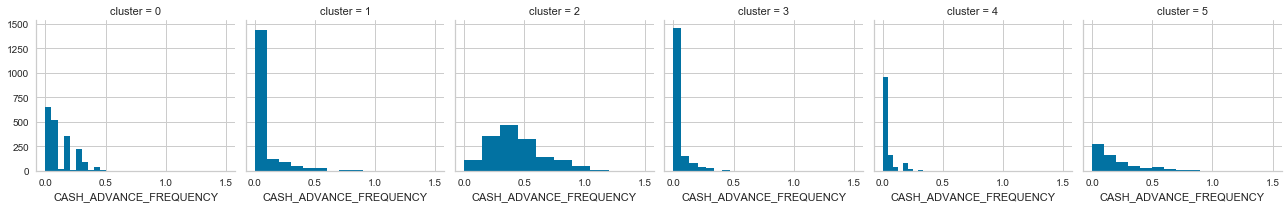

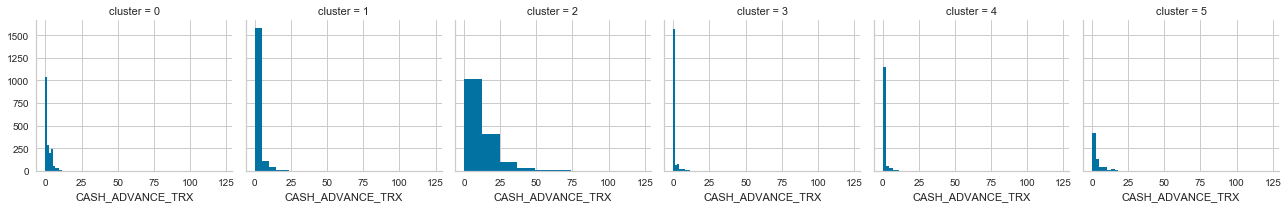

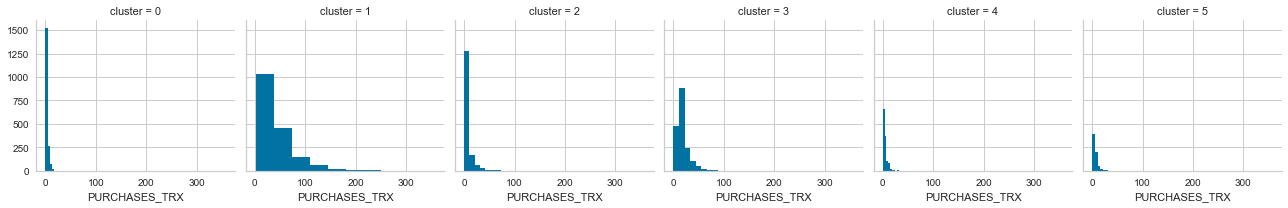

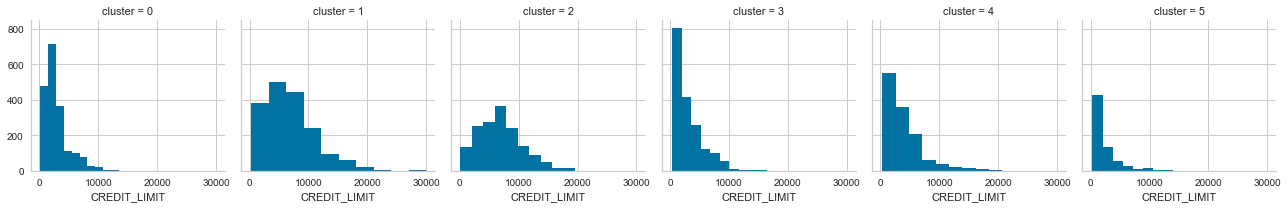

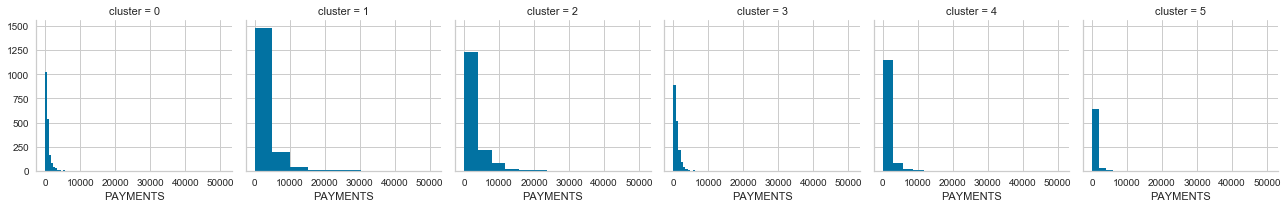

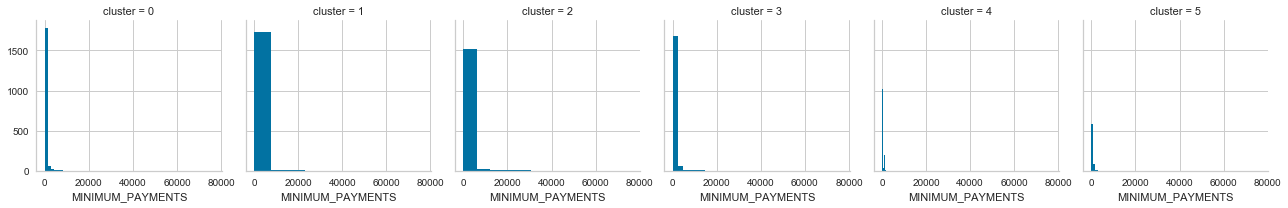

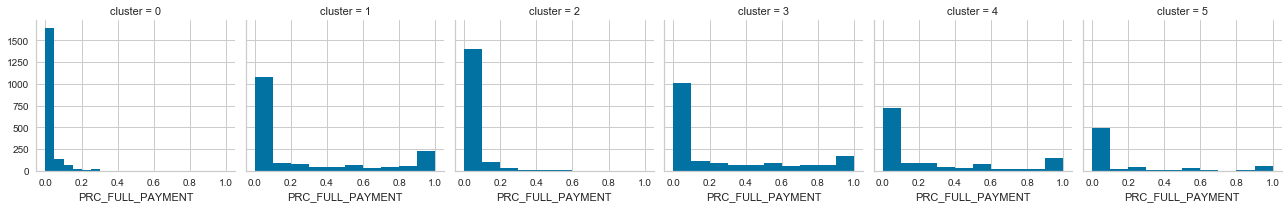

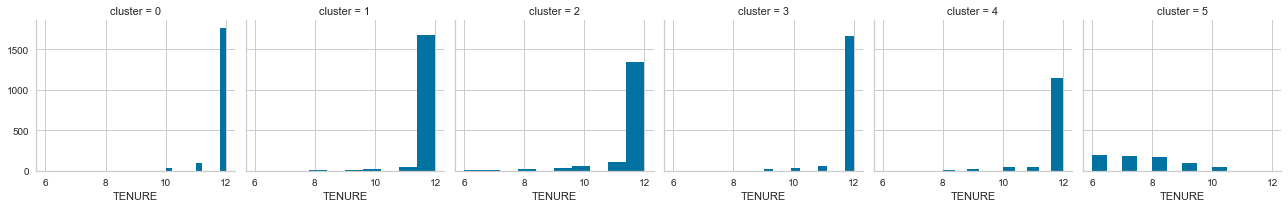

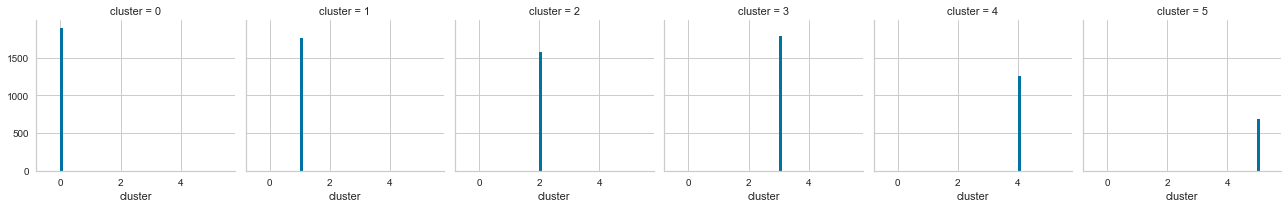

In [26]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

Use some interpretability measure like Random Forests' feature importance to get a better understanding of the clusters

In [49]:
X = clusters.drop(['cluster'],axis=1)
Y = clusters['cluster']
names = clusters.columns
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.3448, 'ONEOFF_PURCHASES_FREQUENCY'), (0.1303, 'CASH_ADVANCE_TRX'), (0.0863, 'TENURE'), (0.0676, 'BALANCE'), (0.0501, 'PURCHASES'), (0.0476, 'PURCHASES_INSTALLMENTS_FREQUENCY'), (0.0462, 'CASH_ADVANCE'), (0.0363, 'CREDIT_LIMIT'), (0.0337, 'PURCHASES_TRX'), (0.0319, 'CASH_ADVANCE_FREQUENCY'), (0.0307, 'ONEOFF_PURCHASES'), (0.0263, 'BALANCE_FREQUENCY'), (0.0234, 'PAYMENTS'), (0.0183, 'MINIMUM_PAYMENTS'), (0.0148, 'PURCHASES_FREQUENCY'), (0.0081, 'INSTALLMENTS_PURCHASES'), (0.0035, 'PRC_FULL_PAYMENT')]


In [ ]:
Would making some sort of CART tree help here?

## Visualising the clusters

We'll use PCA to take our data down to 2 dimensions - we will lose information like this, but as we are only using this for visualiation, its doesn't matter much

In [27]:
dist = 1 - cosine_similarity(normalized_df)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

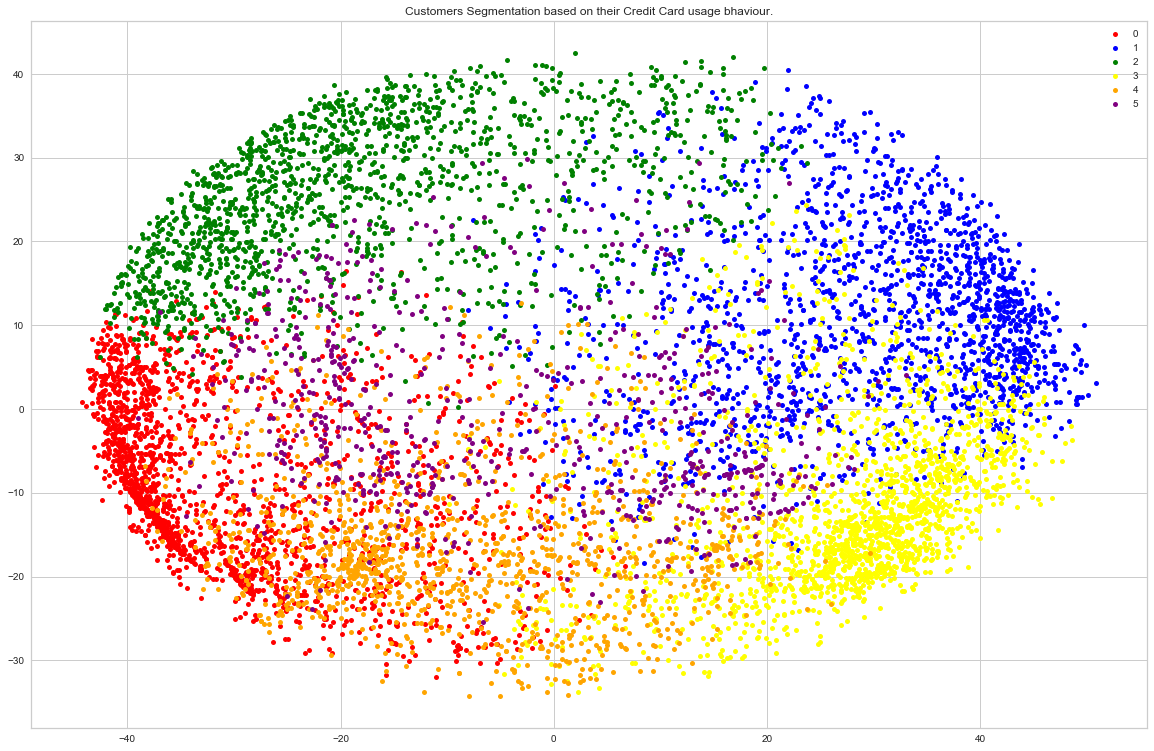

In [28]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: '0', 
         1: '1', 
         2: '2', 
         3: '3', 
         4: '4',
         5:'5'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

Once we know the clusters a little better, we can make statements on what each colour represents. 

## Finding new Customers based on our clustering

Perhaps I could make a randomly generated set of customers and try pick out the profitable ones?

# Conclusions and References

Credit to Saba Naseem Butt for her Kernel on visualisations